In [6]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [3]:
spam_data = pd.read_csv('spambase.csv')
spam_data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [7]:
X = spam_data.drop('1', axis=1)
y = spam_data['1']  # colonna che segna se è spam o meno

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
KNN = KNeighborsClassifier(n_neighbors=5)
start_time=time.time()
KNN.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
KNN.score(X_test, y_test)

Training time: 0.009513


0.7945652173913044

In [14]:
start_time=time.time()
y_predict = KNN.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_predict).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))

Prediction time: 0.229791
Missclassified examples: 189
Accuracy: 0.795


Text(33.22222222222222, 0.5, 'Truth')

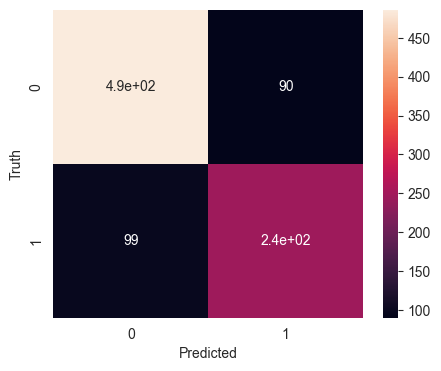

In [16]:
cm = confusion_matrix(y_test, y_predict)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')